In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
## set work working directory
DIR = '/content/drive/MyDrive/Colab Notebooks/Applied Linear Algebra'
DATA_DIR = '/content/drive/MyDrive/ForStudents/Data'



In [ ]:
#load the data
FILE = DATA_DIR + '/ecg_missing.txt'
df_ecg =pd.read_csv(FILE,header = None ,names =['ecg_values'])
df_ecg['ecg_values']=df_ecg['ecg_values'].astype(float)
df_ecg.tail(5)

,ecg_values
195,NaN
196,0.033077
197,NaN
198,NaN
199,0.023651


range(0, 200)


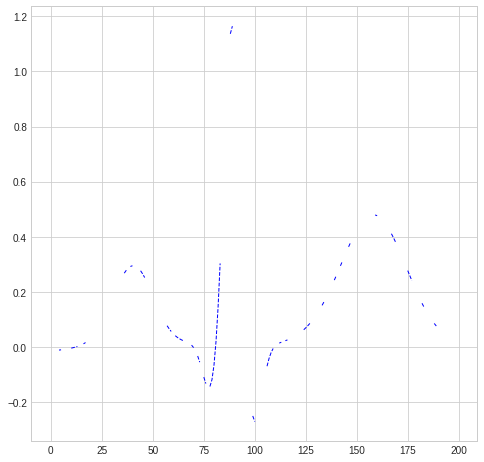

In [ ]:
#component plot of the ecg signal

fig, ax= plt.subplots(1,1,figsize=(8,8))
componenet_index=range(0,len(df_ecg['ecg_values']))
print(componenet_index)
ax.plot(componenet_index,df_ecg['ecg_values'],linewidth =1,linestyle = 'dashed',color='blue')

In [ ]:
df_ecg['ecg_values'].values

array([-1.4374358e-02,            nan, -1.2637355e-02,            nan,
       -1.0812403e-02, -9.8533655e-03,            nan,            nan,
       -6.5482859e-03,            nan, -3.7513235e-03, -2.0578644e-03,
       -9.4258541e-05,  2.2061528e-03,            nan,            nan,
        1.1933259e-02,  1.6432082e-02,            nan,  2.7900408e-02,
                  nan,            nan,  5.2836413e-02,            nan,
                  nan,            nan,            nan,  1.1955439e-01,
                  nan,            nan,            nan,  1.8927629e-01,
                  nan,  2.2432987e-01,            nan,            nan,
        2.6819605e-01,  2.7884396e-01,            nan,  2.9247613e-01,
        2.9511999e-01,            nan,  2.9169886e-01,            nan,
        2.7691699e-01,  2.6566740e-01,  2.5236573e-01,            nan,
                  nan,            nan,            nan,  1.6913212e-01,
                  nan,  1.3481272e-01,            nan,  1.0374964e-01,
      

In [ ]:
T_unknown=df_ecg[ df_ecg['ecg_values'].isnull()].index
T_known=df_ecg[ ~df_ecg['ecg_values'].isnull()].index
print(type(T_unknown))
print(T_unknown)
print(T_known)

<class 'pandas.core.indexes.numeric.Int64Index'>
Int64Index([  1,   3,   6,   7,   9,  14,  15,  18,  20,  21,  23,  24,  25,
             26,  28,  29,  30,  32,  34,  35,  38,  41,  43,  47,  48,  49,
             50,  52,  54,  56,  60,  66,  67,  68,  71,  74,  77,  84,  86,
             87,  90,  91,  93,  94,  96,  97,  98, 101, 103, 104, 105, 110,
            111, 114, 117, 119, 120, 121, 123, 128, 130, 132, 135, 137, 138,
            141, 144, 145, 148, 150, 151, 152, 153, 154, 155, 157, 158, 161,
            162, 163, 165, 166, 170, 171, 172, 173, 174, 178, 180, 181, 184,
            185, 187, 190, 191, 192, 193, 195, 197, 198],
           dtype='int64')
Int64Index([  0,   2,   4,   5,   8,  10,  11,  12,  13,  16,  17,  19,  22,
             27,  31,  33,  36,  37,  39,  40,  42,  44,  45,  46,  51,  53,
             55,  57,  58,  59,  61,  62,  63,  64,  65,  69,  70,  72,  73,
             75,  76,  78,  79,  80,  81,  82,  83,  85,  88,  89,  92,  95,
             99, 100

In [ ]:
X_known=df_ecg[ ~df_ecg['ecg_values'].isnull()].values
print(X_known)

[[-1.4374358e-02]
 [-1.2637355e-02]
 [-1.0812403e-02]
 [-9.8533655e-03]
 [-6.5482859e-03]
 [-3.7513235e-03]
 [-2.0578644e-03]
 [-9.4258541e-05]
 [ 2.2061528e-03]
 [ 1.1933259e-02]
 [ 1.6432082e-02]
 [ 2.7900408e-02]
 [ 5.2836413e-02]
 [ 1.1955439e-01]
 [ 1.8927629e-01]
 [ 2.2432987e-01]
 [ 2.6819605e-01]
 [ 2.7884396e-01]
 [ 2.9247613e-01]
 [ 2.9511999e-01]
 [ 2.9169886e-01]
 [ 2.7691699e-01]
 [ 2.6566740e-01]
 [ 2.5236573e-01]
 [ 1.6913212e-01]
 [ 1.3481272e-01]
 [ 1.0374964e-01]
 [ 7.7566183e-02]
 [ 6.6488692e-02]
 [ 5.6786325e-02]
 [ 4.1356533e-02]
 [ 3.5450843e-02]
 [ 3.0563746e-02]
 [ 2.6503058e-02]
 [ 2.3035374e-02]
 [ 7.1758438e-03]
 [-1.8258006e-03]
 [-3.2324290e-02]
 [-5.4580566e-02]
 [-1.0887994e-01]
 [-1.3214744e-01]
 [-1.4281210e-01]
 [-1.1800725e-01]
 [-6.4454915e-02]
 [ 2.2472551e-02]
 [ 1.4558586e-01]
 [ 3.0343132e-01]
 [ 6.8578156e-01]
 [ 1.1362935e+00]
 [ 1.1638875e+00]
 [ 8.1561486e-01]
 [ 2.0040482e-01]
 [-2.4972163e-01]
 [-2.6991059e-01]
 [-2.3291409e-01]
 [-6.91888

In [ ]:
# build the sampling matrix S1 and S2
I=np.eye(len(df_ecg))
S1=I[: , T_known]
S2=I[: , T_unknown]
print(S2)
print('--------------------------')
print(S1)




[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
--------------------------
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
#build matrix D the secound-difference
n=4
np.diag([1,2,3,4])



array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [ ]:
np.once